# Zig-zag graphene nanoribbon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

plt.rcParams['figure.dpi'] = 500


N=50
a=1
t=0.24
phi=np.pi/2
m=0.7

def finite_haldane(kx):
    H=np.zeros((2*N,2*N))

    for i,j in itertools.product(np.arange(0,N-1),np.arange(0,N-1)):
        if i==j:
            H[j,i]=m/2+t*np.cos(np.sqrt(3)*a*kx+phi)
        elif i==(j-1):
            H[j,i]=2*t*np.cos(np.sqrt(3)*a*kx/2-phi)

    for i,j in itertools.product(np.arange(0,N-1),np.arange(N,2*N-1)):
        if i==(j-N+1):
            H[j,i]=1
        elif i==(j-N):
            H[j,i]=2*np.cos(np.sqrt(3)*a*kx/2)

    for i,j in itertools.product(np.arange(N,2*N-1),np.arange(N,2*N-1)):
        if i==j:
            H[j,i]=-m/2+t*np.cos(np.sqrt(3)*a*kx-phi)
        elif i==(j-1):
            H[j,i]=2*t*np.cos(np.sqrt(3)*a*kx/2+phi)
            
    H=H+np.transpose(np.conj(H))
    
    return H

In [2]:
kxrange=np.arange(0,2*np.pi/np.sqrt(3),0.005)

Energy=np.zeros((2*N,len(kxrange)))

i=-1

for kx in kxrange:
    i+=1
    H=finite_haldane(kx)
    E,states=np.linalg.eigh(H)
    Energy[:,i]=E

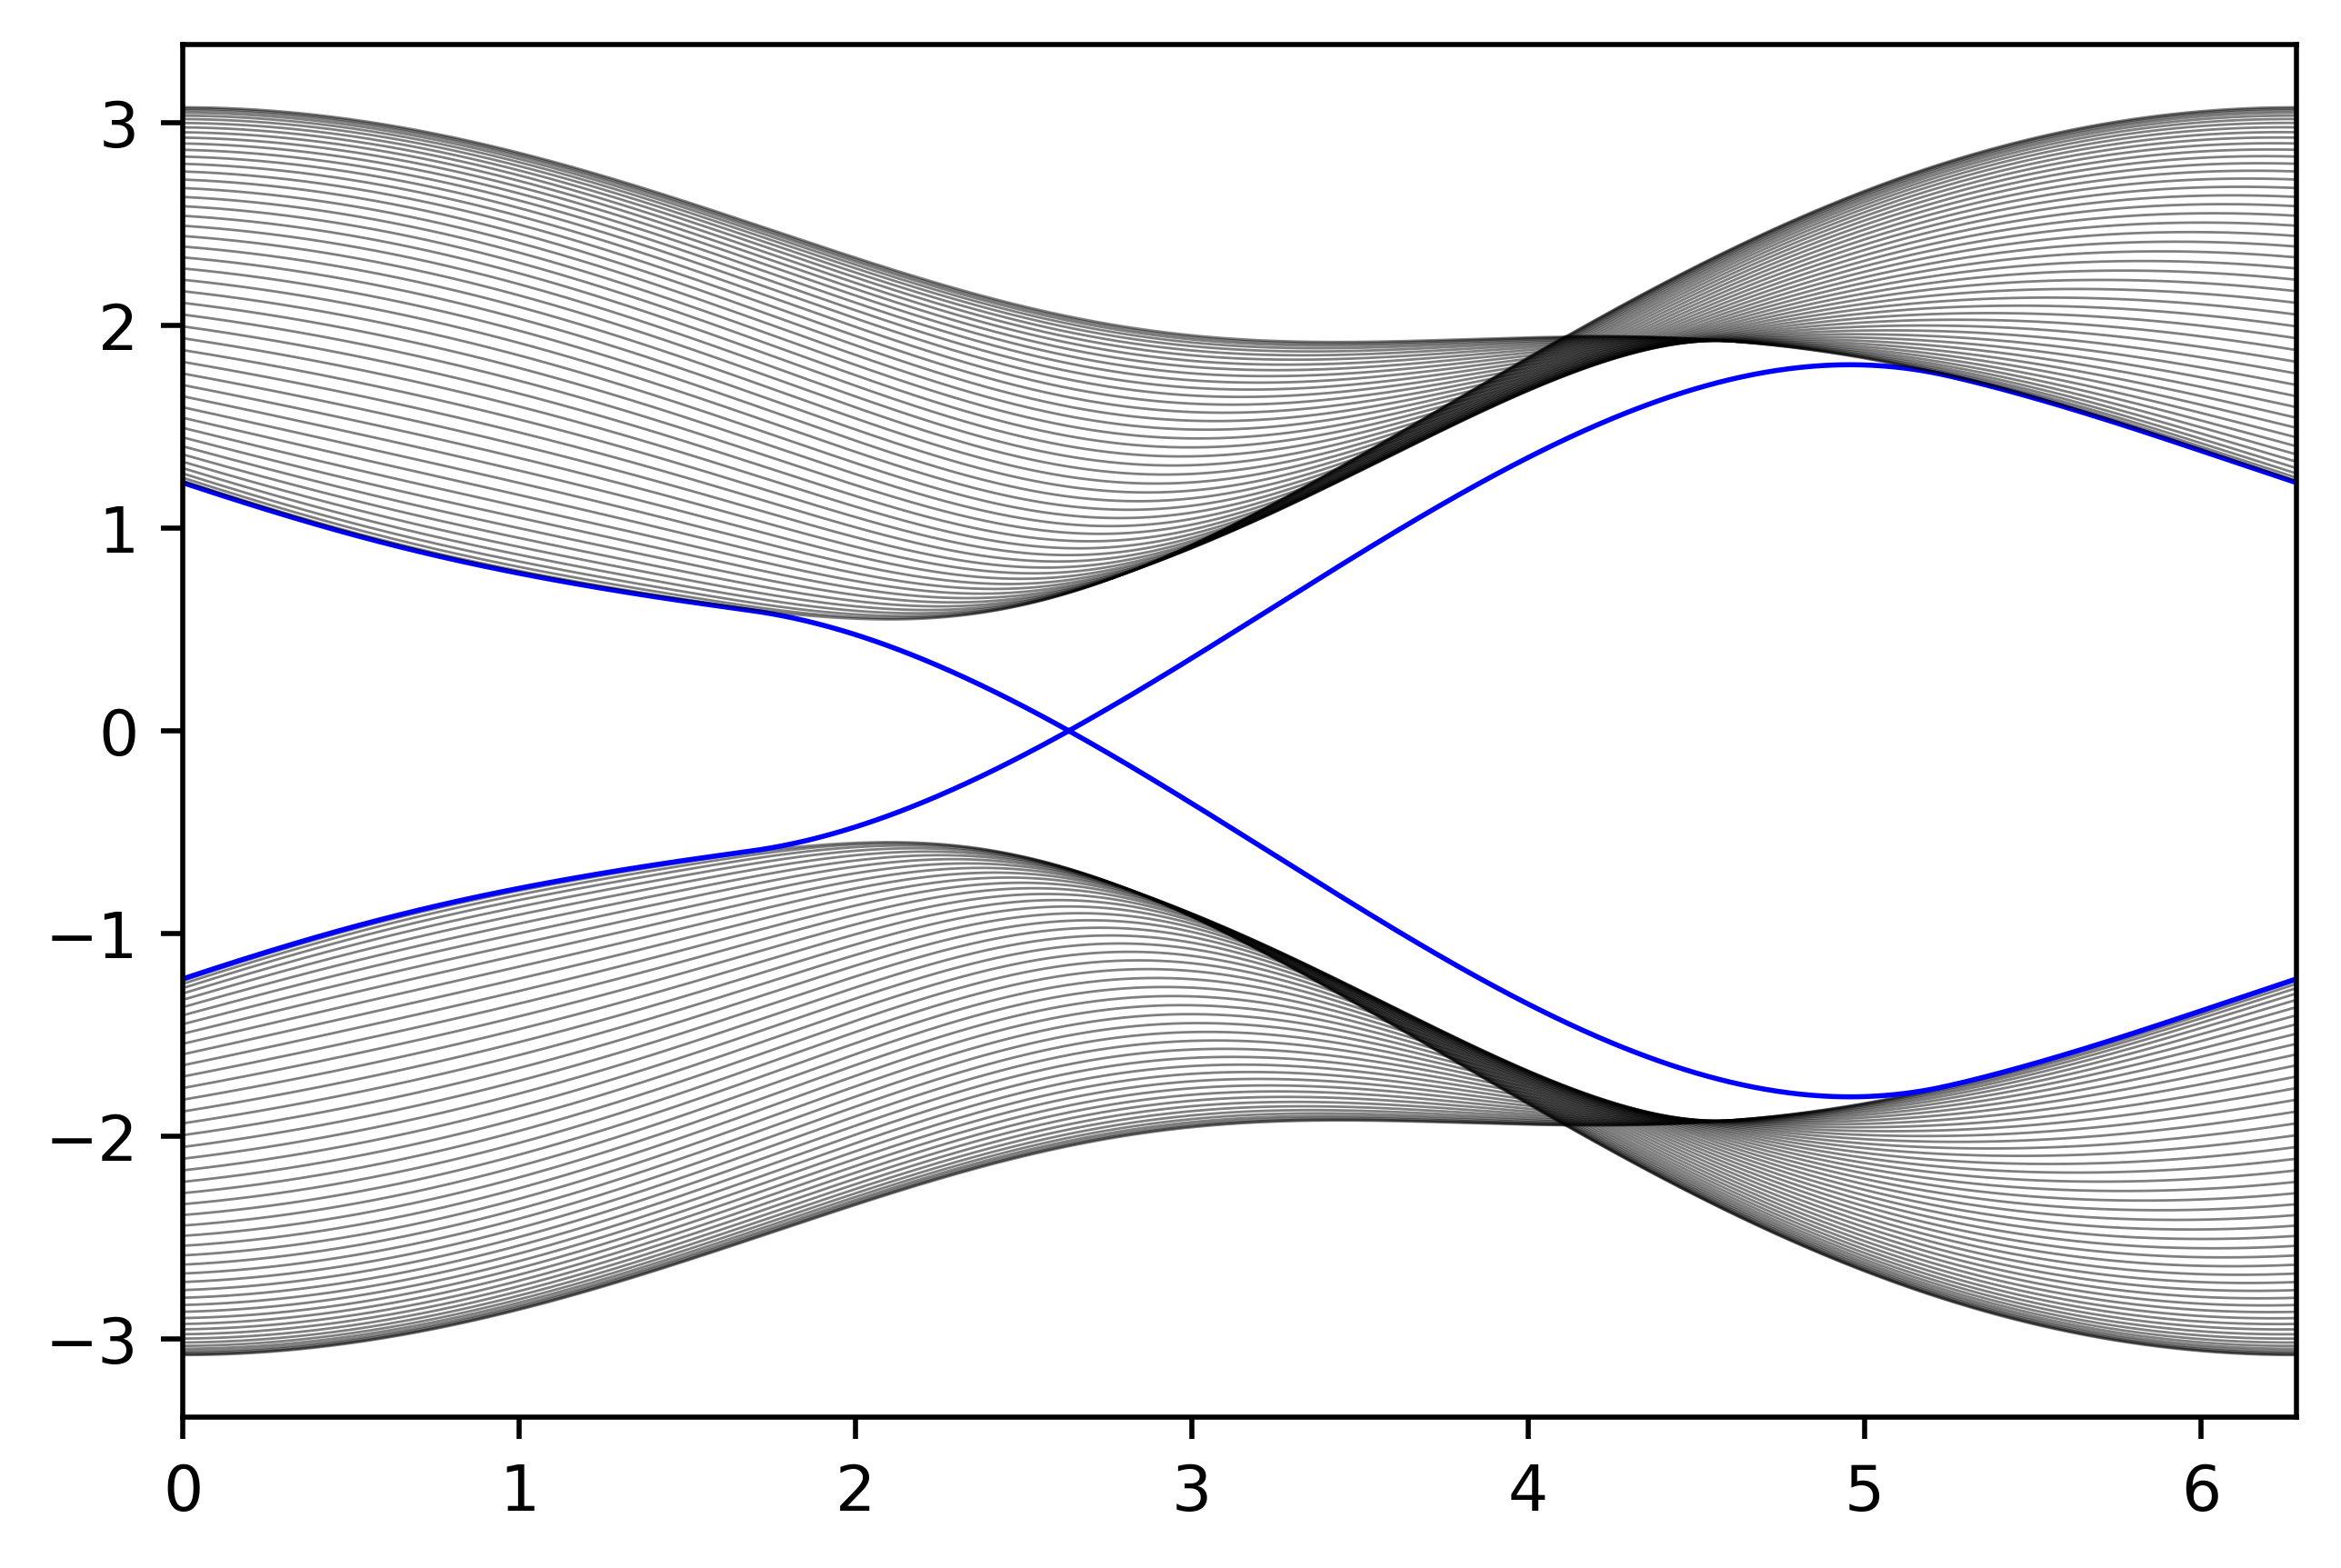

In [3]:
for i in range(0,N-2):
    plt.plot(np.sqrt(3)*kxrange,Energy[i],linewidth=0.4,alpha=0.5,color="k")
    plt.xlim(0,2*np.pi)
for i in range(N-2,N-1):
    plt.plot(np.sqrt(3)*kxrange,Energy[i],linewidth=0.8,alpha=1,color="b")
    plt.xlim(0,2*np.pi)
for i in range(N+1,N+2):
    plt.plot(np.sqrt(3)*kxrange,Energy[i],linewidth=0.8,alpha=1,color="b")
    plt.xlim(0,2*np.pi)
for i in range(N+2,2*N-1):
    plt.plot(np.sqrt(3)*kxrange,Energy[i],linewidth=0.4,alpha=0.5,color="k")
    plt.xlim(0,2*np.pi)
plt.savefig("Edge state.pdf")
plt.show()